In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
%matplotlib inline

# Clean the data

In [3]:
#Load the data
columnNames = ["Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

df = pd.read_csv('abalone.data', header=None)
df.columns = columnNames
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#Clean data (Make sex a numerical category)
df['Sex'] = df['Sex'].map({'F':0,'M':1,'I':2}).astype(int)

#Clean data (Turns rings into Age)
df['Rings'] = df['Rings'].apply(lambda x: x+1.5)
df.rename(columns={'Rings': 'Age'}, inplace=True)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# Make the categories instead of regression

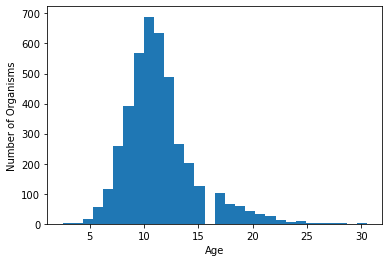

In [5]:
df["Category"] = pd.cut(df["Age"],
                               bins=[0, 5, 10, 15, 20, 25, np.inf],
                               labels=['[0-5)', '[5-10)', '[10-15)', '[15-20)', '[20-25)','[25+)'])
# df["Category"] = pd.cut(df["Age"],
#                                bins=[0., 3., 6., 9., 12., 15., 18., 21., 24., 27., 30., 33., 36, np.inf],
#                                labels=['[0-3)', '[3-6)', '[6-9)', '[9-12)','[12-15)','[15-18)','[18-21)','[21-24)','[24-27)','[27-30)','[30-33)','[33-36)','[36-inf)'])


plt.hist(df['Age'], bins=30)  # density=False would make counts
plt.ylabel('Number of Organisms')
plt.xlabel('Age')
plt.show()

# Prepare data to split into train/test

In [5]:
train, test = train_test_split(df,test_size = .2, random_state=42)

xtrain = train.drop(['Age','Category'], axis=1)
ytrain = train["Category"]

xtest = test.drop(['Age','Category'], axis=1)
ytest = test["Category"]

# Initialize Comparison

In [6]:
algoTimes = []
algoAccuracies = []

algoXLabels = ['DTree Pruning', 'NN', 'DTree Boosting', 'SVM', 'KNN']

# Decision Tree with Pruning

In [7]:
depth_range = range(1, 20)
entropyTrain = []
entropyTest = []
giniTrain = []
giniTest = []
start_time = time.time()
for depth in depth_range:
    #Gini training
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dtree.fit(xtrain, ytrain)
    ypredTrain = dtree.predict(xtrain)
    ypredTest = dtree.predict(xtest)
    
    giniTrain.append(accuracy_score(ytrain,ypredTrain))
    giniTest.append(accuracy_score(ytest,ypredTest))


    #Entropy Training
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dtree.fit(xtrain, ytrain)
    ypredTrain = dtree.predict(xtrain)
    ypredTest = dtree.predict(xtest)
    
    entropyTrain.append(accuracy_score(ytrain,ypredTrain))
    entropyTest.append(accuracy_score(ytest,ypredTest))
algoTimes.append(time.time() - start_time)

71.88995215311004
72.24880382775119


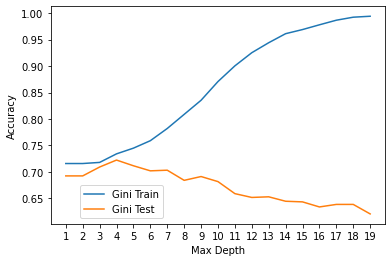

In [8]:
# Gini vs Entropy
plt.plot(depth_range,giniTrain,label='Gini Train')
plt.plot(depth_range,giniTest, label='Gini Test')
plt.xticks(depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(.35, 0.2))
print(max(entropyTest) * 100)
print(max(giniTest) * 100)
algoAccuracies.append(max(giniTest))

99.97006884166417
99.40137683328345


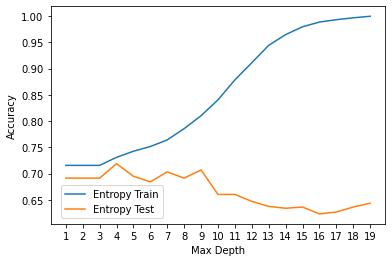

In [9]:
# Gini vs Entropy
plt.plot(depth_range,entropyTrain,label='Entropy Train')
plt.plot(depth_range,entropyTest, label='Entropy Test')
plt.xticks(depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(.35, 0.2))
print(max(entropyTrain) * 100)
print(max(giniTrain) * 100)

# Neural Networks

In [10]:
hiddenlayer = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
nnTrain = []
nnTest = []
for i in hiddenlayer:
    nn = MLPClassifier(hidden_layer_sizes = (i,), learning_rate_init=0.05, random_state=42)
    nn.fit(xtrain, ytrain)
    ypredTrain = nn.predict(xtrain)
    ypredTest = nn.predict(xtest)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))

74.25920383118827
74.52153110047847


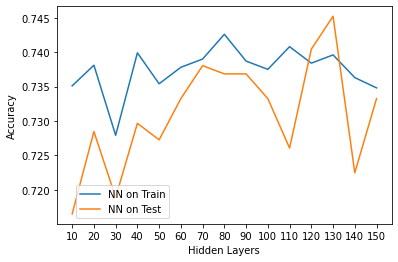

In [11]:
plt.plot(hiddenlayer,nnTrain,label='NN on Train')
plt.plot(hiddenlayer,nnTest,label='NN on Test')
plt.xticks(hiddenlayer)
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

In [12]:
nnParams = {
    'hidden_layer_sizes':[(10,),(30,),(50,),(70,),(90,),(110,),(130,),(150,)],
    'activation':['tanh', 'relu', 'logistic'],
    'solver':['sgd','adam'],
    'alpha':[0.0001,.005,.01,.05],
    'learning_rate':['constant', 'adaptive'],
}
nn = MLPClassifier()
start_time = time.time()
clf = GridSearchCV(nn,nnParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
print('Best parameters found:\n', clf.best_params_)

algoTimes.append(time.time() - start_time)

ypredTest = clf.predict(xtest)
accuracy_score(ytest,ypredTest)

algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Boosted Decision Tree

In [13]:
estimators = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bTreeTrain = []
bTreeTest = []
for i in estimators:
    bDtree = GradientBoostingClassifier(n_estimators=i, random_state=42)
    bDtree.fit(xtrain, ytrain)
    ypredTrain = bDtree.predict(xtrain)
    ypredTest = bDtree.predict(xtest)
    bTreeTrain.append(accuracy_score(ytrain,ypredTrain))
    bTreeTest.append(accuracy_score(ytest,ypredTest))

88.68602214905717
73.08612440191388


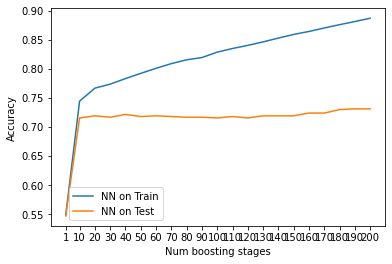

In [14]:
plt.plot(estimators,bTreeTrain,label='NN on Train')
plt.plot(estimators,bTreeTest,label='NN on Test')
plt.xticks(estimators)
plt.xlabel('Num boosting stages')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(bTreeTrain) * 100)
print(max(bTreeTest) * 100)

In [15]:
bdTreeParams = {
    'n_estimators': estimators,
    'max_depth':[3,4,5],
}
bDtree = GradientBoostingClassifier()
start_time = time.time()
clf = GridSearchCV(bDtree,bdTreeParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
algoTimes.append(time.time() - start_time)
print('Best parameters found:\n', clf.best_params_)

ypredTest = clf.predict(xtest)
print(accuracy_score(ytest,ypredTest))
algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'max_depth': 3, 'n_estimators': 10}
0.715311004784689


# Support Vector Machines

In [16]:
#omitted precomputer kernel because it's not a square matrix
kernels = ['poly','rbf','sigmoid', 'linear']
poly = [2,3,4,5,6,7,8]

testAcc = []
trainAcc = []
start_time = time.time()
for kernel in kernels:
    if kernel == 'poly':
        for i in poly:
            svm = SVC(kernel = kernel, degree = i,random_state=42)
            svm.fit(xtrain,ytrain)
            ypredTrain = svm.predict(xtrain)
            ypredTest = svm.predict(xtest)
            trainAcc.append(accuracy_score(ytrain,ypredTrain))
            testAcc.append(accuracy_score(ytest,ypredTest))
    elif kernel == 'sigmoid':
        svm = SVC(kernel = kernel,random_state=42,gamma='auto')
        svm.fit(xtrain,ytrain)
        ypredTrain = svm.predict(xtrain)
        ypredTest = svm.predict(xtest)
        trainAcc.append(accuracy_score(ytrain,ypredTrain))
        testAcc.append(accuracy_score(ytest,ypredTest))
    else:
        svm = SVC(kernel = kernel,random_state=42)
        svm.fit(xtrain,ytrain)
        ypredTrain = svm.predict(xtrain)
        ypredTest = svm.predict(xtest)
        trainAcc.append(accuracy_score(ytrain,ypredTrain))
        testAcc.append(accuracy_score(ytest,ypredTest))
algoTimes.append(time.time()-start_time)

72.24880382775119
72.3436096976953


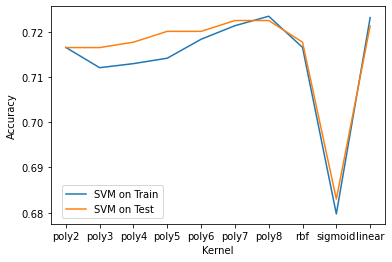

In [17]:
xlabels = ['poly2', 'poly3', 'poly4', 'poly5','poly6','poly7','poly8','rbf','sigmoid','linear']
plt.plot(xlabels, trainAcc,label='SVM on Train')
plt.plot(xlabels, testAcc,label='SVM on Test')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(testAcc) * 100)
print(max(trainAcc) * 100)
algoAccuracies.append(max(testAcc))

# k-nearest neighbors

In [18]:
neighbors = range(1, 20)
knnTrain = []
knnTest = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    ypredTrain = knn.predict(xtrain)
    ypredTest = knn.predict(xtest)
    knnTrain.append(accuracy_score(ytrain,ypredTrain))
    knnTest.append(accuracy_score(ytest,ypredTest))

100.0
73.08612440191388


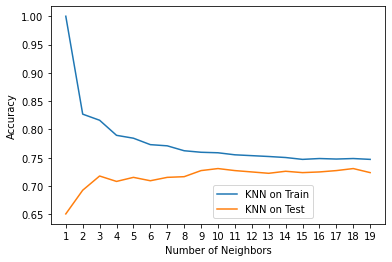

In [19]:
plt.plot(neighbors, knnTrain,label='KNN on Train')
plt.plot(neighbors, knnTest,label='KNN on Test')
plt.xticks(neighbors)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.2))
print(max(knnTrain) * 100)
print(max(knnTest) * 100)

In [20]:
knnParams = {
    'n_neighbors':[1,2,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
}
knn = KNeighborsClassifier()
start_time = time.time()
clf = GridSearchCV(knn,knnParams,n_jobs=-1,cv=2)
clf.fit(xtrain,ytrain)
algoTimes.append(time.time() - start_time)
print('Best parameters found:\n', clf.best_params_)

ypredTest = clf.predict(xtest)
print(accuracy_score(ytest,ypredTest))
algoAccuracies.append(accuracy_score(ytest,ypredTest))

Best parameters found:
 {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.7296650717703349


# Comparison of Algorithms

In [21]:
algoAccuracies

[0.722488038277512,
 0.7332535885167464,
 0.715311004784689,
 0.722488038277512,
 0.7296650717703349]

In [22]:
algoTimes

[0.9861087799072266,
 259.95147585868835,
 39.98699903488159,
 30.180845737457275,
 1.506115436553955]

Text(0.5, 0, 'Algorithms')

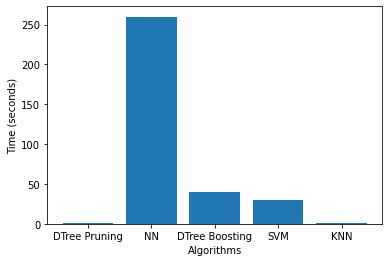

In [23]:
plt.bar(algoXLabels, algoTimes)
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithms')

Text(0.5, 0, 'Algorithms')

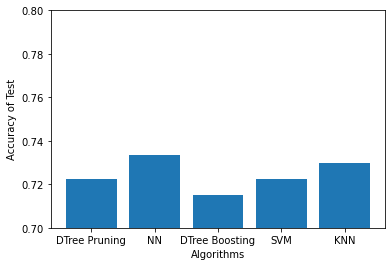

In [27]:
plt.bar(algoXLabels, algoAccuracies)
plt.ylabel('Accuracy of Test')
plt.ylim(.7, .8)
plt.xlabel('Algorithms')